In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Ecommerce.csv')

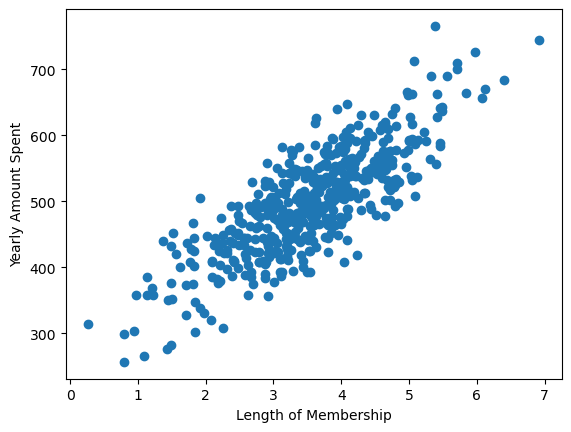

In [24]:
x = df['Length of Membership']
y = df['Yearly Amount Spent']

plt.scatter(x, y)
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [25]:
# Mean Sauared Error loss as function
def loss_function(m, b, dataPoints):
    total_error = 0
    for i in range(len(dataPoints)):
        x = dataPoints.iloc[i]["Length of Membership"]
        y = dataPoints.iloc[i]["Yearly Amount Spent"]
        total_error += (y - (m * x + b)) ** 2
    
    return total_error / float(len(dataPoints))

In [26]:
def gradient_descent(m_now, b_now, dataPoints, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(dataPoints)

    for i in range(n):
        x = dataPoints.iloc[i]["Length of Membership"]
        y = dataPoints.iloc[i]["Yearly Amount Spent"]
        
        m_gradient += (-2/n) * x * (y - (m_now * x + b_now))
        b_gradient += (-2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [42]:
m = 0
b = 0
L = 0.001
epochs = 300

In [43]:
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, df, L)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250


In [44]:
print(m, b)

124.5776625437476 43.201670837697876


Text(0.5, 1.0, 'Linear Regression Fit')

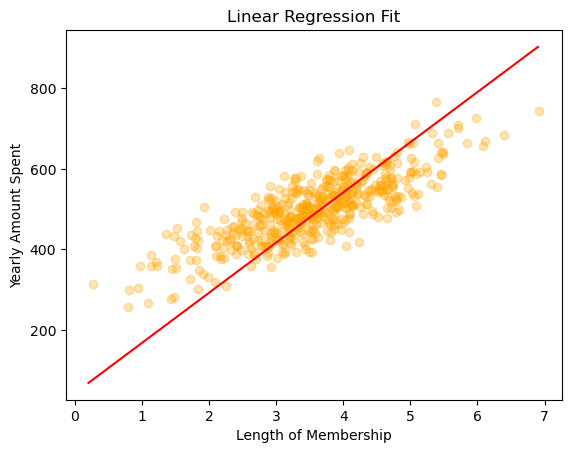

In [47]:
x_vals = [x / 10 for x in range(2, 70)]  # 0.2 to 6.9 with step 0.1
y_vals = [m * x + b for x in x_vals]

plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'], color='orange', alpha=0.3)
# plt.plot(list(range(0, 6)), [m * x + b for x in range(0, 6)], color="red")
plt.plot(x_vals, y_vals, color='red')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.title("Linear Regression Fit")